In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("full_results.csv", names=["h2s", "i", "k", "genvar.method", "n_causals", "svm_auc", "lr_auc", "d"])
df

,h2s,i,k,genvar.method,n_causals,svm_auc,lr_auc,d
0,0.3,10,5,0.3.p,0,0.464064,0.536292,3000
1,0.3,10,25,0.3.p,0,0.509616,0.626434,3000
2,0.3,10,100,0.3.p,0,0.504238,0.660019,3000
3,0.3,10,300,0.3.p,0,0.565817,0.704644,3000
4,0.3,10,5,0.3.ln,0,0.599972,0.612935,3000
...,...,...,...,...,...,...,...,...
4699,0.7,9,300,0.95.p,0,0.500000,0.722539,3000
4700,0.7,9,5,0.95.ln,0,0.590678,0.619548,3000
4701,0.7,9,25,0.95.ln,0,0.591304,0.636730,3000
4702,0.7,9,100,0.95.ln,1,0.523374,0.692696,3000


In [ ]:
from FADS.input import get_dset

dset = get_dset("")

In [1]:
!ls full_results/

ls: cannot access 'fu': No such file or directory


In [73]:
with open("/home/shussain/hapgen2/1000GP_Phase3/data/chr22.legend", 'w') as n_leg:
    n_leg.write("id position a0 a1 TYPE AFR AMR EAS EUR SAS ALL\n")

with open("/home/shussain/hapgen2/1000GP_Phase3/data/chr22.haps", 'w') as n_haps:
    pass

from tqdm.auto import tqdm
    
with open("/home/shussain/hapgen2/1000GP_Phase3/data/1000GP_Phase3_chr22.legend") as leg:
    with open("/home/shussain/hapgen2/1000GP_Phase3/data/1000GP_Phase3_chr22.hap") as haps:
        leg.__next__()
        for l, h in tqdm(zip(leg, haps)):
            if "Biallelic_SNP" in l:
                with open("/home/shussain/hapgen2/1000GP_Phase3/data/chr22.legend", 'a') as n_leg:
                    n_leg.write(l)
                with open("/home/shussain/hapgen2/1000GP_Phase3/data/chr22.haps", 'a') as n_haps:
                    n_haps.write(h)


0it [00:00, ?it/s]

In [6]:
df["method"] = df["genvar.method"].str.extract("(p|ln)")
df["genvar"] = df["genvar.method"].str.extract(r"(0.\d+)")

In [64]:
df.dtypes

h2s              float64
i                  int64
k                  int64
genvar.method     object
n_causals          int64
svm_auc          float64
lr_auc           float64
d                  int64
method            object
genvar            object
dtype: object

In [7]:
from itertools import product
import re

genvars = []
H2s = []
I = []
Meth = []

with open("namespaces", 'r') as f:
    for l in f:
        genvars.append(re.findall('genvar=0.\d+', l)[0][len("genvar="):])
        H2s.append(re.findall('h2s=0.\d+', l)[0][len("h2s="):])
        I.append(re.findall('i=\d+', l)[0][len("i="):])
        Meth.append(re.findall("method='(p|ln)'", l)[0])
        
        
    #for h2s, genvar, i, meth in product(['0.3', '0.5', '0.7'], [''])

In [10]:
from tqdm import tqdm
with open("missinggg", 'w') as w:
    pass
for genvar, h2s, sim, method in zip(genvars, H2s, I, Meth):
    le = len(df.query(f"(genvar == '{genvar}') & (h2s == {float(h2s)}) & (i == {int(sim)}) & (method == '{method}')"))
    if le < 4:
        with open("missinggg", 'a') as w:
            w.write(f"full_results/results/d_3000/h2s_{h2s}/genvar_{genvar}/sim_{sim}/n_causals.csv\n")
        print(le, (genvar, h2s, sim, method))

0 ('0.5', '0.3', '12', 'p')
0 ('0.5', '0.3', '12', 'ln')
0 ('0.5', '0.5', '17', 'p')
0 ('0.5', '0.5', '17', 'ln')
0 ('0.5', '0.7', '34', 'p')
0 ('0.5', '0.7', '34', 'ln')
0 ('0.5', '0.5', '35', 'p')
0 ('0.5', '0.5', '35', 'ln')
0 ('0.5', '0.7', '43', 'p')
0 ('0.5', '0.7', '43', 'ln')
0 ('0.5', '0.7', '50', 'p')
0 ('0.5', '0.7', '50', 'ln')
0 ('0.7', '0.7', '28', 'p')
0 ('0.7', '0.7', '28', 'ln')
0 ('0.7', '0.5', '29', 'p')
0 ('0.7', '0.5', '29', 'ln')
0 ('0.95', '0.7', '15', 'p')
0 ('0.95', '0.7', '15', 'ln')
0 ('0.95', '0.5', '17', 'p')
0 ('0.95', '0.5', '17', 'ln')
0 ('0.95', '0.5', '27', 'p')
0 ('0.95', '0.5', '27', 'ln')
0 ('0.95', '0.5', '35', 'p')
0 ('0.95', '0.5', '35', 'ln')


In [58]:
pd.DataFrame({
    "genvar": genvars,
    "h2s": H2s,
    "sim": I,
    "method": Meth
})

,genvar,h2s,sim,method
0,0.3,0.5,1,p
1,0.3,0.7,1,p
2,0.3,0.3,1,p
3,0.3,0.3,1,ln
4,0.3,0.3,2,p
...,...,...,...,...
1195,0.95,0.7,50,p
1196,0.95,0.7,49,ln
1197,0.95,0.3,50,ln
1198,0.95,0.5,50,ln


In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelEncoder



Y = np.load("/home/shussain/Simulated_data/19092021/d_3000/genVar_0.5/h2s_0.5/sim_17/sim_17/PS/output/y_test.npy")
Y

FileNotFoundError: [Errno 2] No such file or directory: '/home/shussain/Simulated_data/19092021/d_3000/genVar_0.5/h2s_0.5/sim_17/sim_17/PS/output/y_test.npy'

(array([1980.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         990.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

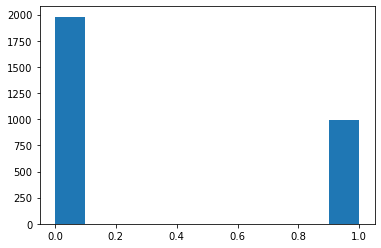

In [3]:
plt.hist(pd.read_csv("/home/shussain/FADS/simulate/prelim/prelim_22.controls.gen", sep="\s+").values[:, 5:].ravel())

In [10]:
from pandas_plink import read_plink

bim, fam, bed = read_plink("/home/shussain/Simulated_data/18082021/3000/0.7/sim_10/sim_10/PS/output/Genotypes")

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) read_plink. (use function `read_plink1_bin` instead.) -- Deprecated since version 2.1.0.
  This is separate from the ipykernel package so we can avoid doing imports until
Mapping files: 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]


(array([ 227310.,       0.,       0.,       0.,       0., 1054537.,
              0.,       0.,       0., 2318153.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

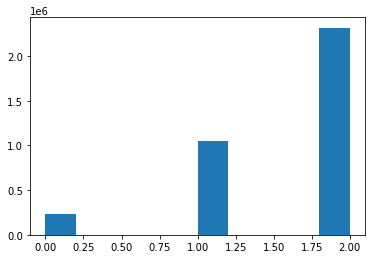

In [11]:
plt.hist(bed.ravel().compute())

In [17]:
pd.read_csv("misslog", sep="\s+", names=["Seq", "Host", "Starttime", "JobRuntime", "Send", "Receive", "Exitval", "Signal", "Command"], skiprows=1)

,,,,,,Seq,Host,Starttime,JobRuntime,Send,Receive,Exitval,Signal,Command
4,:,1.632660e+09,64.168,0,58,1,0,python,train.py,0.50,17,ln,0.5,3000
3,:,1.632660e+09,64.176,0,57,1,0,python,train.py,0.50,17,p,0.5,3000
1,:,1.632660e+09,89.053,0,57,1,0,python,train.py,0.50,12,p,0.3,3000
5,:,1.632660e+09,43.483,0,57,1,0,python,train.py,0.50,34,p,0.7,3000
7,:,1.632660e+09,41.766,0,57,1,0,python,train.py,0.50,35,p,0.5,3000
9,:,1.632660e+09,41.902,0,57,1,0,python,train.py,0.50,43,p,0.7,3000
8,:,1.632660e+09,585.677,0,58,1,0,python,train.py,0.50,35,ln,0.5,3000
10,:,1.632660e+09,522.228,0,58,1,0,python,train.py,0.50,43,ln,0.7,3000
11,:,1.632661e+09,95.334,0,57,1,0,python,train.py,0.50,50,p,0.7,3000
13,:,1.632661e+09,43.687,0,57,1,0,python,train.py,0.70,28,p,0.7,3000


In [13]:
!ls /home/shussain/Simulated_data/19092021/d_3000/genVar_0.5/h2s_0.5/sim_17/sim_17/

log.txt.gz  prelim


In [9]:
import seaborn as sns

sns.load_dataset("titanic")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
df.groupby(["h2s", "genvar", "method"]).count()

i    k  genvar.method  n_causals  svm_auc  lr_auc    d
h2s genvar method                                                          
0.3 0.3    ln      200  200            200        200      200     200  200
           p       200  200            200        200      200     200  200
    0.5    ln      196  196            196        196      196     196  196
           p       196  196            196        196      196     196  196
    0.7    ln      200  200            200        200      200     200  200
           p       200  200            200        200      200     200  200
    0.95   ln      200  200            200        200      200     200  200
           p       200  200            200        200      200     200  200
0.5 0.3    ln      200  200            200        200      200     200  200
           p       200  200            200        200      200     200  200
    0.5    ln      192  192            192        192      192     192  192
           p       192  192            192        192      192     192  192
    0.7    ln      196  196            196        196      196     196  196
           p       196  196            196        196      196     196  196
    0.95   ln      188  188            188        188      188     188  188
           p       188  188            188        188      188     188  188
0.7 0.3    ln      200  200            200        200      200     200  200
           p       200  200            200        200      200     200  200
    0.5    ln      188  188            188        188      188     188  188
           p       188  188            188        188      188     188  188
    0.7    ln      196  196            196        196      196     196  196
           p       196  196            196        196      196     196  196
    0.95   ln      196  196            196        196      196     196  196
           p       196  196            196        196      196     196  196

In [29]:
from glob import glob
from os import listdir
from path

g = glob("/home/shussain/Simulated_data/13092021/d_3000/genVar_*/h2s_*/")
g_ = glob("results/results/d_3000/h2s_*/genvar_*/")
for d in g_:
    print(d, len(listdir(d)))

SyntaxError: EOL while scanning string literal (<ipython-input-29-44d7375ca8e4>, line 5)

In [10]:
sns.set_theme(
    context = 'paper',
    palette='Set1',
    style = 'whitegrid',
    font_scale = 4
)
cmap=sns.color_palette('Set1')
cmap

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [39]:
df.sort_values(["genvar", "h2s", "k"])

,h2s,i,k,genvar.method,n_causals,svm_auc,lr_auc,d,method,genvar
0,0.3,10,5,0.3.p,0,0.410979,0.655315,3000,p,0.3
4,0.3,10,5,0.3.ln,0,0.410979,0.655315,3000,ln,0.3
8,0.3,11,5,0.3.p,1,0.443026,0.625496,3000,p,0.3
12,0.3,11,5,0.3.ln,0,0.470574,0.622435,3000,ln,0.3
16,0.3,12,5,0.3.p,0,0.505348,0.613897,3000,p,0.3
...,...,...,...,...,...,...,...,...,...,...
4135,0.7,7,300,0.95.ln,2,0.800127,0.878818,3000,ln,0.95
4139,0.7,8,300,0.95.p,1,0.588149,0.734232,3000,p,0.95
4143,0.7,8,300,0.95.ln,2,0.656745,0.729890,3000,ln,0.95
4147,0.7,9,300,0.95.p,2,0.344789,0.764879,3000,p,0.95


0it [00:00, ?it/s]

Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox


/home/shussain/miniconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox


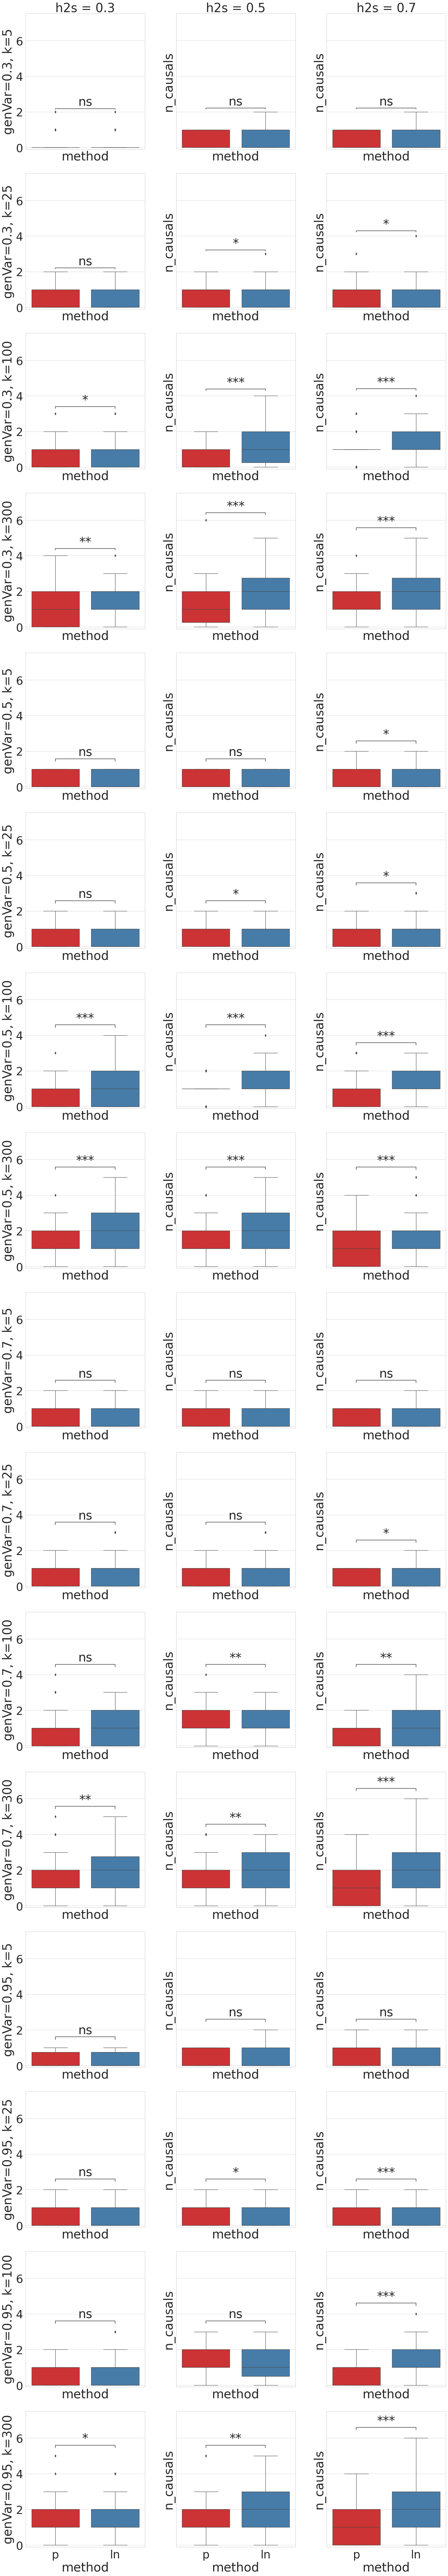

In [14]:
fig, axes = plt.subplots(16, 3, figsize=(21, 112), sharex=True, sharey=True)
plt.tight_layout()
from tqdm.auto import tqdm
from statannot import add_stat_annotation

iterable = tqdm(zip(axes.ravel(), df.sort_values(["genvar", "k", "h2s"]).groupby(["genvar", "k", "h2s"])))
for ax, ((genvar, k, h2s), dff) in iterable:
    plt.sca(ax)
    sns.boxplot(data=dff, x="method", y="n_causals", order=["p", "ln"])
    #print(k, genvar)
    if k==5 and genvar=='0.3':
        plt.title(f"h2s = {h2s}")
    if h2s==0.3:
        plt.ylabel(f"genVar={genvar}, k={k}")
    """
    for genvar in df["genvar"].unique():
        for k in df["k"].unique():
            for h2s in df["h2s"].unique():
                plt.sca(ax)
                dff = df.query(f"")
    """
    test_results = add_stat_annotation(
    ax, x=dff["method"], y=dff[f"n_causals"], 
    order=["p", "ln"],
    box_pairs=[
        ("p", "ln")
    ],
    test='Wilcoxon', text_format='star',
    loc='inside', verbose=0,
    pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
    )

plt.savefig("n_causals_full.pdf")

Using zero_method  wilcox


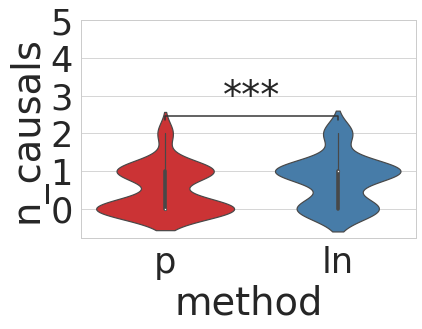

In [29]:
dd = df[(df["genvar"] == '0.95') & (df["h2s"] == 0.7) & (df["k"] == 25)]

sns.violinplot(data=dd, x="method", y="n_causals")

plt.yticks([0, 1, 2, 3, 4, 5])

test_results = add_stat_annotation(
    plt.gca(), x=dd["method"], y=dd[f"n_causals"], 
    order=["p", "ln"],
    box_pairs=[
        ("p", "ln")
    ],
    test='Wilcoxon', text_format='star',
    loc='inside', verbose=0,
    pvalue_thresholds=[[1e-3, "***"], [1e-2, "**"], [0.05, "*"], [1, "ns"]]
    )

0it [00:00, ?it/s]

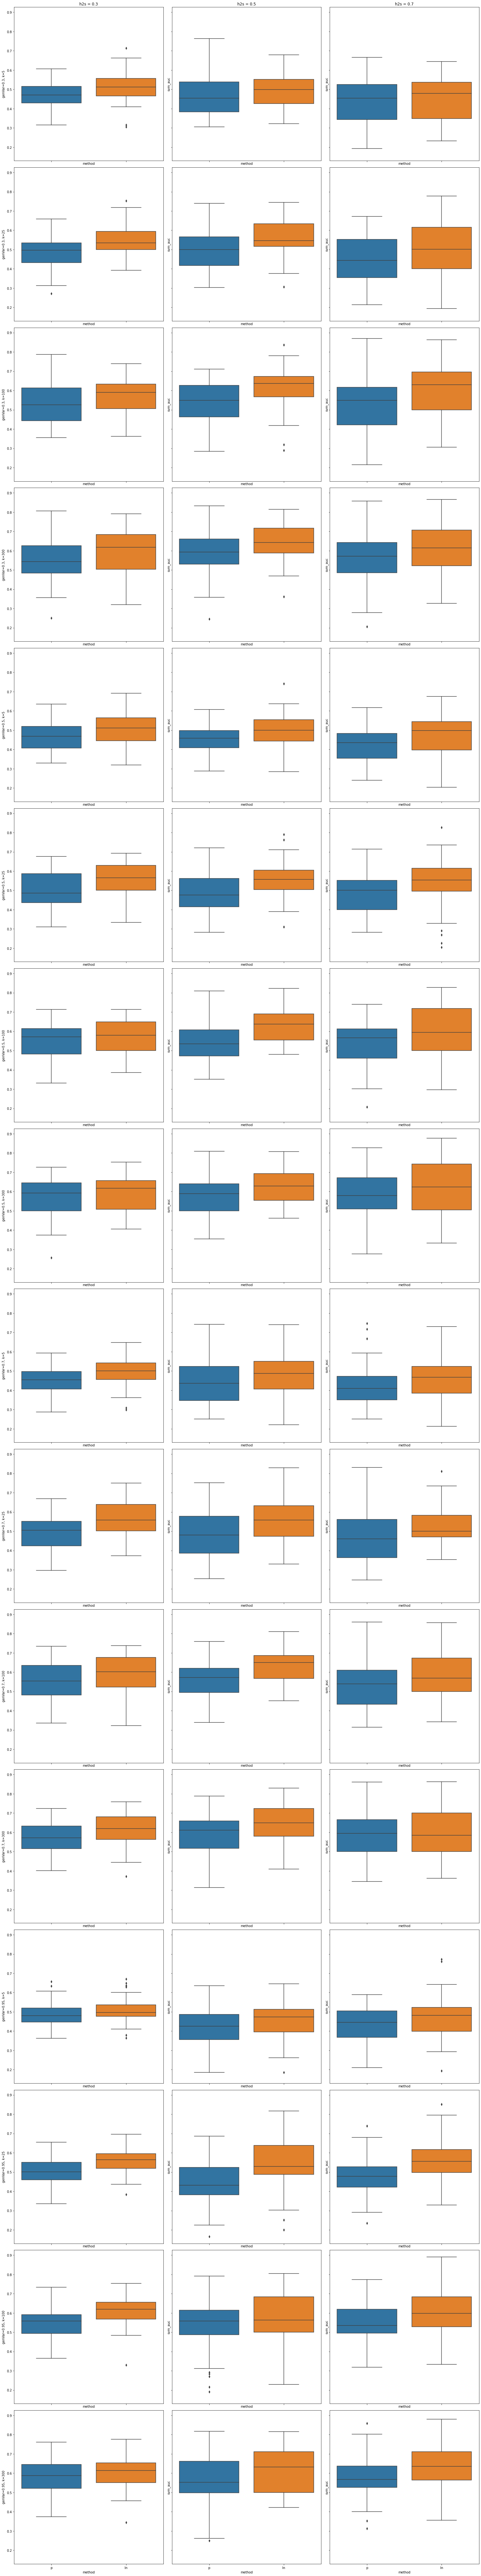

In [7]:
fig, axes = plt.subplots(16, 3, figsize=(21, 112), sharex=True, sharey=True)
plt.tight_layout()
from tqdm.auto import tqdm
iterable = tqdm(zip(axes.ravel(), df.sort_values(["genvar", "k", "h2s"]).groupby(["genvar", "k", "h2s"])))
for ax, ((genvar, k, h2s), dff) in iterable:
    plt.sca(ax)
    sns.boxplot(data=dff, x="method", y="svm_auc")
    #print(k, genvar)
    if k==5 and genvar=='0.3':
        plt.title(f"h2s = {h2s}")
    if h2s==0.3:
        plt.ylabel(f"genVar={genvar}, k={k}")

plt.savefig("svm_full.pdf")

0it [00:00, ?it/s]

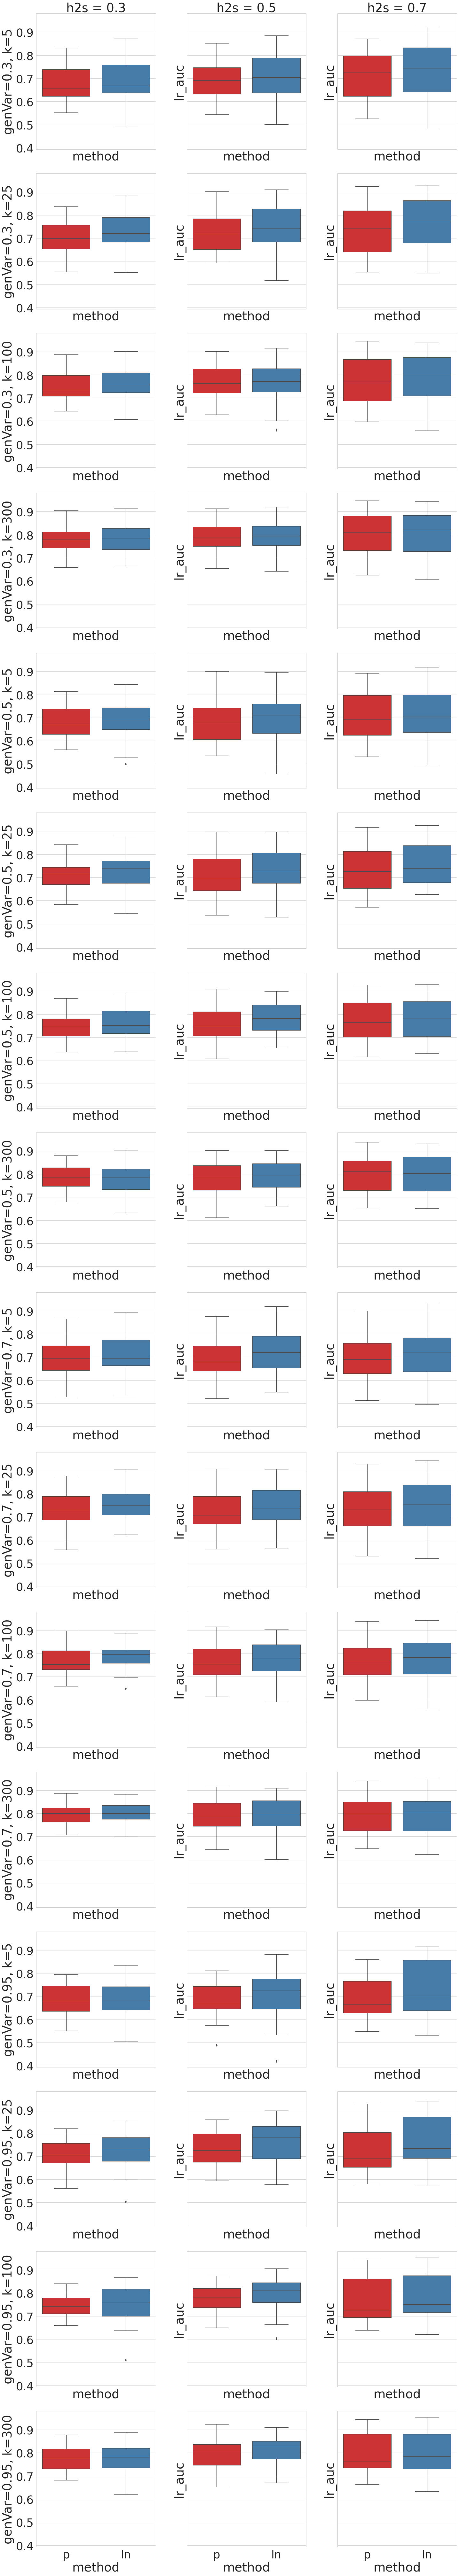

In [58]:
fig, axes = plt.subplots(16, 3, figsize=(21, 112), sharex=True, sharey=True)
plt.tight_layout()
from tqdm.auto import tqdm
iterable = tqdm(zip(axes.ravel(), df.sort_values(["genvar", "k", "h2s"]).groupby(["genvar", "k", "h2s"])))
for ax, ((genvar, k, h2s), dff) in iterable:
    plt.sca(ax)
    sns.boxplot(data=dff, x="method", y="lr_auc")
    #print(k, genvar)
    if k==5 and genvar=='0.3':
        plt.title(f"h2s = {h2s}")
    if h2s==0.3:
        plt.ylabel(f"genVar={genvar}, k={k}")

plt.savefig("lr.pdf")